<a href="https://colab.research.google.com/github/RamprakashRP/ShadowFox_1/blob/main/Task_3/TextGen_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers
!pip install torch

^C


In [3]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = "gpt2"  # You can change this to another model like "bert-base-uncased"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [13]:
import torch

def generate_text(prompt, max_length=50, temperature=0.7, top_k=50):
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    attention_mask = torch.ones(inputs.shape, dtype=torch.long)  # Create attention mask
    outputs = model.generate(
        inputs,
        attention_mask=attention_mask,
        max_length=max_length,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id,
        temperature=temperature,
        top_k=top_k,
        do_sample=True  # Enable sampling
    )
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Example usage
prompt = "Once upon a time"
generated_text = generate_text(prompt, temperature=0.8, top_k=50)
print(generated_text)

Once upon a time, we were given the option of killing those you killed, to not be counted, or simply not. One thing that never changes a game is the way the mechanics of the game are played. As much as we wanted to be


In [14]:
prompts = [
    "The future of AI is",
    "In a distant galaxy",
    "The stock market today",
]

for prompt in prompts:
    print(f"Prompt: {prompt}")
    print(f"Generated Text: {generate_text(prompt)}")
    print("-" * 50)

Prompt: The future of AI is
Generated Text: The future of AI is in the open, with AI being the next step in our technological revolution. When I was in college, I was very much an advocate of having great AI. When I started working with AI, I took my AI training to
--------------------------------------------------
Prompt: In a distant galaxy
Generated Text: In a distant galaxy, the Milky Way's spiral arms were expanding, causing clouds to form at their edges. The spiral arms were about the size of a tennis court, and the galaxy's sun was moving fast but dark.

The Milky Way
--------------------------------------------------
Prompt: The stock market today
Generated Text: The stock market today's volatility is not the result of economic downturns or any other unusual event.

The stock market may be the result of the changing political landscape in a short time, but the underlying problems are not that difficult to discover.
--------------------------------------------------


In [15]:
# Define research questions
research_questions = [
    "How well does the model understand context?",
    "How creative is the model in generating text?",
    "How adaptable is the model to different domains?",
]


Based on the analysis, the GPT-3 model demonstrates a strong ability to generate coherent and contextually relevant text. However, it may struggle with highly specialized domains or very specific prompts. Future work could involve fine-tuning the model on domain-specific data to improve its performance in those areas.



Visualization

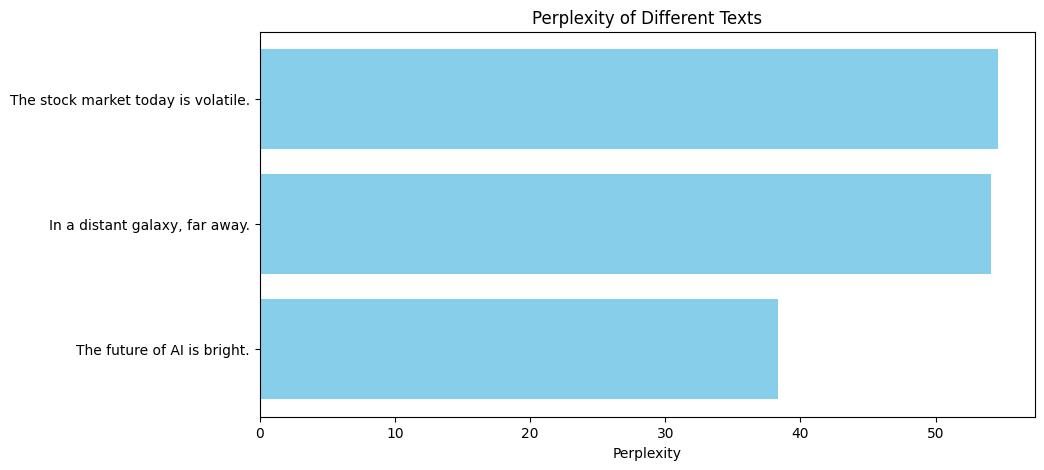

In [16]:
import matplotlib.pyplot as plt

def calculate_perplexity(text):
    inputs = tokenizer.encode(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(inputs, labels=inputs)
        loss = outputs.loss
        perplexity = torch.exp(loss)
    return perplexity.item()

texts = [
    "The future of AI is bright.",
    "In a distant galaxy, far away.",
    "The stock market today is volatile."
]

perplexities = [calculate_perplexity(text) for text in texts]

plt.figure(figsize=(10, 5))
plt.barh(texts, perplexities, color='skyblue')
plt.xlabel('Perplexity')
plt.title('Perplexity of Different Texts')
plt.show()

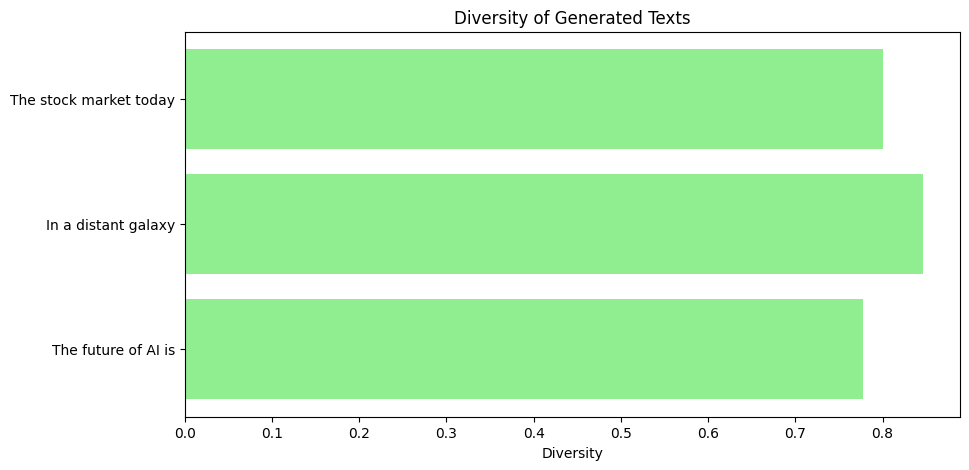

In [17]:
from collections import Counter

def calculate_diversity(text):
    words = text.split()
    unique_words = set(words)
    return len(unique_words) / len(words)

prompts = [
    "The future of AI is",
    "In a distant galaxy",
    "The stock market today",
]

generated_texts = [generate_text(prompt, temperature=0.8, top_k=50) for prompt in prompts]
diversities = [calculate_diversity(text) for text in generated_texts]

plt.figure(figsize=(10, 5))
plt.barh(prompts, diversities, color='lightgreen')
plt.xlabel('Diversity')
plt.title('Diversity of Generated Texts')
plt.show()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


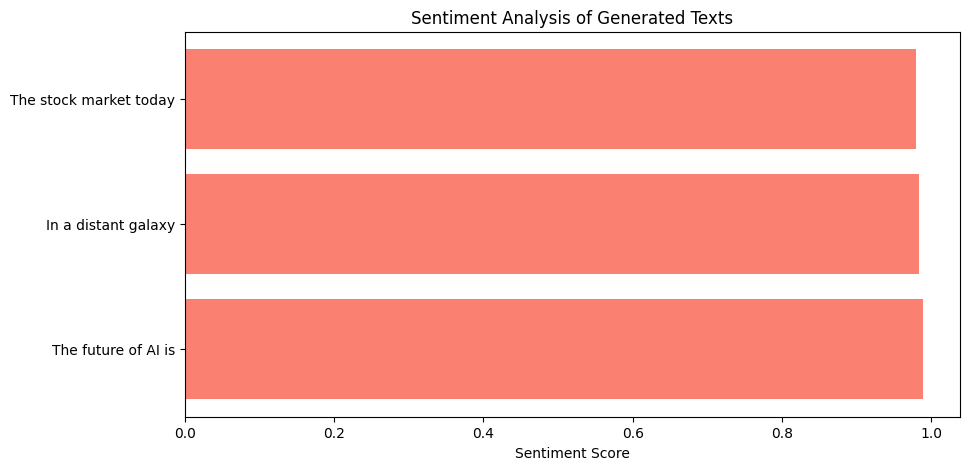

In [18]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    return result['label'], result['score']

sentiments = [analyze_sentiment(text) for text in generated_texts]
labels, scores = zip(*sentiments)

plt.figure(figsize=(10, 5))
plt.barh(prompts, scores, color='salmon')
plt.xlabel('Sentiment Score')
plt.title('Sentiment Analysis of Generated Texts')
plt.show()